# Случайный лес

В этом практическом задании вы решите задачу регрессии на реальных данных при помощи линейной модели и случайного леса. 

## Цели практической работы

* Научиться применять случайный лес в задаче регрессии.
* Научиться сравнивать качество случайного леса с качеством линейной модели.
* Научиться настраивать гиперпараметры леса.

## Что входит в работу

* Выполнить предобработку данных.
* Обучить линейную регрессию на данных задачи.
* Обучить случайный лес на данных задачи.
* Подобрать гиперпараметры для леса.
* Визуализировать важность признаков у леса.

## Что оценивается

*  Все ячейки заполнены; при запуске ячеек  Python не выдаёт информацию об ошибках.
*  Качество итоговой модели $R^2$ превышает 0,95.


## Что нужно сделать

Постройте модели, предсказывающие стоимость автомобилей по характеристикам.

Признаков у машин много, но в этой работе обойдёмся только числовыми признаками:
*  year — год производства автомобиля;
*  km_driven — пробег;
*  seats — количество посадочных мест;
*  mileage — другая характеристика пробега;
*  engine — мощность двигателя;
*  max_power — мощность автомобиля.

Целевая переменная — selling_price.

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv("cars_train.csv")
test = pd.read_csv("cars_test.csv")

In [2]:
train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,"Maruti Swift VXI BSIII,2007,130000,120000,Petr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hyundai Xcent 1.2 VTVT E Plus,2017.0,440000.0,45000.0,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [3]:
train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [4]:
test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [5]:
test.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [6]:
def print_info(df):
    print('Количество полностью заполненных объектов из всей выборки: ', len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки: ', round(len(df.dropna()) / len(df) * 100, 2))
    
print_info(train)

Количество полностью заполненных объектов из всей выборки:  6497
Процент полностью заполненных объектов из всей выборки:  92.84


In [7]:
missing_values = ((train.isna().sum() / len(train)) * 100).sort_values(ascending = False)
missing_values

mileage          7.159188
engine           7.159188
torque           7.159188
seats            7.159188
max_power        7.073450
year             4.272649
selling_price    4.272649
km_driven        4.272649
fuel             4.272649
seller_type      4.272649
transmission     4.272649
owner            4.272649
name             0.000000
dtype: float64

In [8]:
missing_columns = missing_values[missing_values.values > 0].index.tolist()
missing_columns

['mileage',
 'engine',
 'torque',
 'seats',
 'max_power',
 'year',
 'selling_price',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner']

In [9]:
train[missing_columns].isna().sum()

mileage          501
engine           501
torque           501
seats            501
max_power        495
year             299
selling_price    299
km_driven        299
fuel             299
seller_type      299
transmission     299
owner            299
dtype: int64

In [10]:
test[missing_columns].isna().sum()

mileage          19
engine           19
torque           19
seats            19
max_power        19
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
dtype: int64

Создайте объекты Xtrain, ytrain, Xtest, ytest. Запишите в них матрицы «объект — признак» и векторы целевой переменной для тренировочного и тестового датасетов.

# Ваш код здесь

# Моё пояснение пропуска выполняемого действия:
На мой взгляд разбиение данных на тренировочную и тестовую часть без предварительной обработки данных это бессмысленный шаг, который способен привести только к лишним действиям в дальнейшем. Я считаю целессобразным вначале выполнить подготовку данных, т.е. удаление, где это необходимо пропусков, или их заполнение каким-либо значением и т.п. И после этих действий будет более целесообразно разбить данный датасет на две части

В тренировочных данных есть автомобили, для которых неизвестна стоимость. Удалите эти автомобили из трейна.

In [11]:
# Ваш код здесь
train_copy = train.copy()
test_copy = test.copy()
train_copy = train_copy[train_copy['selling_price'].notna()]

In [12]:
train_copy[missing_columns].isna().sum()

mileage          202
engine           202
torque           202
seats            202
max_power        196
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
dtype: int64

Перед обучением моделей обработайте данные.

Обратите внимание, что столбцы mileage, engine и max_power по смыслу числовые. Чтобы превратить их в числовые столбцы, отбросьте единицы измерения и оставьте только числа. В столбцах есть пропущенные значения, их при обработке трогать не нужно.

In [13]:
# Ваш код здесь
train_copy['mileage'] = train_copy['mileage'].str.replace(' kmpl', '')
train_copy['mileage'] = train_copy['mileage'].str.replace(' km/kg', '')
train_copy['engine'] = train_copy['engine'].str.replace(' CC', '')
train_copy['max_power'] = train_copy['max_power'].str.replace(' bhp', '')
train_copy.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0,1396,90,22.4 kgm at 1750-2750rpm,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017.0,440000.0,45000.0,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,113.75nm@ 4000rpm,5.0
6,Maruti 800 DX BSII,2001.0,45000.0,5000.0,Petrol,Individual,Manual,Second Owner,16.1,796,37,59Nm@ 2500rpm,4.0


In [14]:
test_copy['mileage'] = test_copy['mileage'].str.replace(' kmpl', '')
test_copy['mileage'] = test_copy['mileage'].str.replace(' km/kg', '')
test_copy['engine'] = test_copy['engine'].str.replace(' CC', '')
test_copy['max_power'] = test_copy['max_power'].str.replace(' bhp', '')
test_copy.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498,112,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497,108.5,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799,130,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498,98.6,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172,65,96 Nm at 3000 rpm,5.0


In [15]:
train_copy[['mileage', 'engine', 'max_power']].describe()

,mileage,engine,max_power
count,6497,6497,6503
unique,369,116,297
top,18.9,1248,74
freq,197,885,330


In [16]:
train_copy['mileage'] = train_copy['mileage'].astype('float')
train_copy['engine'] = train_copy['engine'].astype('float')
train_copy['max_power'] = train_copy['max_power'].astype('float')

In [17]:
train_copy['mileage'].describe()

count    6497.000000
mean       19.581199
std         4.044749
min         0.000000
25%        16.900000
50%        19.670000
75%        22.500000
max        42.000000
Name: mileage, dtype: float64

In [18]:
test_copy['mileage'] = test_copy['mileage'].astype('float')
test_copy['engine'] = test_copy['engine'].astype('float')
test_copy['max_power'] = test_copy['max_power'].astype('float')

Оставьте в данных только шесть числовых столбцов:

year, km_driven, seats, engine, mileage, max_power

In [19]:
# Ваш код здесь
columns_for_drop = ['name', 'selling_price', 'fuel', 'seller_type', 'transmission', 'owner', 'torque']
train_new = train_copy.copy()
train_new.drop(columns = columns_for_drop, axis = 1, inplace = True)
train_new.head()

,year,km_driven,mileage,engine,max_power,seats
0,2014.0,145500.0,23.40,1248.0,74.00,5.0
1,2014.0,120000.0,21.14,1498.0,103.52,5.0
2,2010.0,127000.0,23.00,1396.0,90.00,5.0
4,2017.0,45000.0,20.14,1197.0,81.86,5.0
6,2001.0,5000.0,16.10,796.0,37.00,4.0


In [20]:
columns_for_drop = ['name', 'selling_price', 'fuel', 'seller_type', 'transmission', 'owner', 'torque']
test_new = test_copy.copy()
test_new.drop(columns = columns_for_drop, axis = 1, inplace = True)
test_new.head()

,year,km_driven,mileage,engine,max_power,seats
0,2010,168000,14.0,2498.0,112.0,7.0
1,2017,25000,21.5,1497.0,108.5,5.0
2,2007,218463,12.9,1799.0,130.0,5.0
3,2015,173000,25.1,1498.0,98.6,5.0
4,2011,70000,16.5,1172.0,65.0,5.0


Теперь заполните пропуски следующим образом:

*    вычислите средние значения по столбцам тренировочной выборки;

*    добавьте в пропуски в тренировочных и тестовых данных вычисленные средние.

In [21]:
# Ваш код здесь
mileage_mean = train_new['mileage'].mean()
engine_mean = train_new['engine'].mean()
max_power_mean = train_new['max_power'].mean()
seats_mean = train_new['seats'].mean()
train_new['mileage'] = train_new['mileage'].fillna(mileage_mean)
train_new['engine'] = train_new['engine'].fillna(engine_mean)
train_new['max_power'] = train_new['max_power'].fillna(max_power_mean)
train_new['seats'] = train_new['seats'].fillna(seats_mean)

In [22]:
test_new['mileage'] = test_new['mileage'].fillna(mileage_mean)
test_new['engine'] = test_new['engine'].fillna(engine_mean)
test_new['max_power'] = test_new['max_power'].fillna(max_power_mean)
test_new['seats'] = test_new['seats'].fillna(seats_mean)

In [23]:
missing_values = ((train_new.isna().sum() / len(train_new)) * 100).sort_values(ascending = False)
missing_values

year         0.0
km_driven    0.0
mileage      0.0
engine       0.0
max_power    0.0
seats        0.0
dtype: float64

In [24]:
missing_values = ((test_new.isna().sum() / len(test_new)) * 100).sort_values(ascending = False)
missing_values

year         0.0
km_driven    0.0
mileage      0.0
engine       0.0
max_power    0.0
seats        0.0
dtype: float64

Теперь на обработанных тренировочных данных обучите:

*  линейную регрессию,
*  случайный лес с параметрами по умолчанию.

На обработанных тестовых данных сделайте предсказание и вычислите метрику $R^2$. 

In [25]:
# Ваш код здесь
from sklearn.model_selection import train_test_split

X = train_new
y = train_copy['selling_price']

X_t = test_new
y_t = test_copy['selling_price']

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.75, random_state=123)

In [26]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [27]:
model_lr = LogisticRegression()

In [28]:
model_lr.fit(X_train, y_train)

C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
preds_lr_train = model_lr.predict(X_train)

In [30]:
r2_score(y_train, preds_lr_train)

0.04295825239743456

In [31]:
preds_lr_val = model_lr.predict(X_val)

In [32]:
r2_score(y_val, preds_lr_val)

0.036863121302066926

In [33]:
model_rf = RandomForestRegressor()

In [34]:
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [35]:
preds_rf_train = model_rf.predict(X_train)

In [36]:
r2_score(y_train, preds_rf_train)

0.993612213225695

In [37]:
preds_rf_val = model_rf.predict(X_val)

In [38]:
r2_score(y_val, preds_rf_val)

0.9624633586150219

In [39]:
preds_lr_test = model_lr.predict(X_t)

In [40]:
r2_score(y_t, preds_lr_test)

0.05527140098324912

In [41]:
preds_rf_test = model_rf.predict(X_t)

In [42]:
r2_score(y_t, preds_rf_test)

0.9505323086870969

Какая модель получилась лучше?

In [43]:
# Ваш ответ здесь

Улучшите качество предсказания случайного леса путём подбора гиперпараметров:

*   n_estimators,
*   max_depth,
*   max_features,
*   min_samples_leaf,
*   min_samples_split.

Для подбора гиперпараметров используйте GridSearchCV. Обучайте GridSearchCV по тренировочным данным с разбивкой на три фолда и метрикой $R^2$.

In [44]:
# Ваш код здесь
params = {'max_depth' : np.arange(2, 25, 4),
          'max_features' : ['sqrt', 'log2', None], 
          'n_estimators' : np.arange(10, 200, 10),
          'min_samples_leaf' : np.arange(2, 4, 1)}
gs = GridSearchCV(RandomForestRegressor(), params, cv=3, scoring='r2')

gs.fit(X_val, y_val)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 2,  6, 10, 14, 18, 22]),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': array([2, 3]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
             scoring='r2')

In [45]:
gs.best_estimator_

RandomForestRegressor(max_depth=18, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=30)

In [52]:
#model_rf_new = RandomForestRegressor(max_depth=22, max_features='log2', n_estimators=150)
model_rf_new = RandomForestRegressor(max_depth=18, max_features='sqrt', min_samples_leaf=2, n_estimators=30)

Теперь обучите на тренировочных данных случайный лес с найденными гиперпараметрами. Сделайте предсказание на тестовых данных и оцените его качество ($R^2$).

In [53]:
# Ваш код здесь
model_rf_new.fit(X_train, y_train)

RandomForestRegressor(max_depth=18, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=30)

In [54]:
preds_rf_test_new = model_rf_new.predict(X_t)

In [55]:
r2_score(y_t, preds_rf_test_new)

0.9566885905497071

Модель готова. Осталось её проинтерпретировать.

При помощи метода model.feature_importances_ визуализируйте гистограмму важности признаков у случайного леса с настроенными гиперпараметрами.

In [56]:
# Ваш код здесь
features = X_t.columns
importances_rf = model_rf_new.feature_importances_
indices_rf = np.argsort(importances_rf)

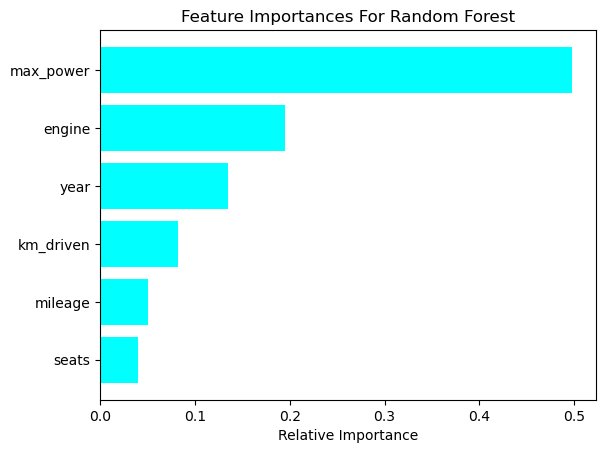

In [57]:
from matplotlib import pyplot as plt

plt.title('Feature Importances For Random Forest')
plt.barh(range(len(indices_rf)), importances_rf[indices_rf], color = 'aqua', align='center')
plt.yticks(range(len(indices_rf)), [features[i] for i in indices_rf])
plt.xlabel('Relative Importance')
plt.show()